# Quick guide to EXPRES data

Guide by Joe Llama (joe.llama@lowell.edu) for The Flatiron solar hack day (2023-03-15)

In [16]:
#%pylab notebook
from astropy.io import fits 
import matplotlib.pyplot as plt
import numpy as np

Using one of the solar spectra as an example

In [62]:
filename = 'Sun_220417.5081.fits'
try:
    hdu = fits.open(filename)
except:
    import urllib.request
    url = 'https://www.dropbox.com/s/qodpsadsi4xujmr/Sun_220417.5080.fits?dl=1'
    urllib.request.urlretrieve(url, filename)
    hdu = fits.open(filename)

In [70]:
hdu[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8720 / length of dimension 1                          
NAXIS2  =                  112 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
VERSION = '0.4.1   '           / EXPRES Pipeline code version                   
EXTNAME = 'EXPOSURE METER + BARY_CORR' / extension name                         
EXTVER  =                    1 / extension value                                
CAL_DATE=            3242018.0 / Date the wavelength calibration image was taken
CAL_SLOP=       0.5288562362

In [64]:
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =               799922 / length of dimension 1                          
NAXIS2  =                   86 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   17 / number of table fields                         
VERSION = '0.4.1   '           / EXPRES Pipeline code version                   
EXTNAME = 'optimal '           / Extraction algorithm                           
DATE-EXT= '2022-09-04T18:35:44.474' / Date and time of extraction               
SCATLGHT=                    T / Scattered light removed before extraction      
EXT_SIZE=                   

## Reduced specrtra are stored in extension 1

Full details on the EXPRES pipeline are in Petersburg+2020: https://ui.adsabs.harvard.edu/abs/2020AJ....159..187P/abstract

Wavelength solution with excalibur in Zhao+2020 https://ui.adsabs.harvard.edu/abs/2021AJ....161...80Z/abstract
 
Telluric modeling with SELENITE in Leet+2019 https://ui.adsabs.harvard.edu/abs/2019AJ....157..187L/abstract

In [65]:
#w = hdu[1].data['bary_excalibur'] # The best wavelength solution, available when the LFC was used. Barycentric corrected
# w = hdu[1].data['bary_wavelength'] # Non-excalbiur wavelength solution, barycentric corrected
w = hdu[1].data['wavelength'] # Non-excalbiur wavelength solution, NOT barycentric corrected
s = hdu[1].data['spectrum'] # Non-normalized spectrum 
e = hdu[1].data['uncertainty'] # Uncertainty
c = hdu[1].data['continuum'] # Continuum model
t = hdu[1].data['tellurics'] # Selenite telluric model

In [66]:
nord, npix = w.shape

In [67]:
print("{0:d} orders, with {1:d} pixels per order".format(nord, npix))

86 orders, with 7920 pixels per order


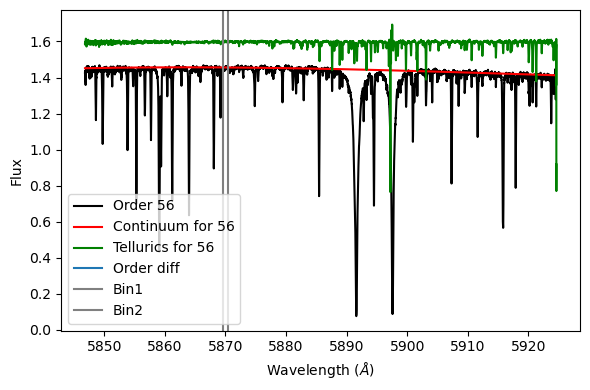

In [99]:
plt.figure(dpi=100)
order = 56
nstart = 200
nfinish = -200
bin1 = 1990
bin2 = 2060
plt.plot(w[order, nstart:nfinish], s[order, nstart:nfinish], c='k', label=f'Order {order}')
plt.plot(w[order, nstart:nfinish], c[order, nstart:nfinish], c='r', label=f'Continuum for {order}')
plt.plot(w[order, nstart:nfinish], t[order, nstart:nfinish] * 1.6, c='g', label=f'Tellurics for {order}')
diff = np.diff(s[order, nstart:nfinish] / t[order, nstart:nfinish])
diff /= np.max(diff)
plt.plot(w[order, nstart:nfinish-1], diff, label='Order diff')
plt.axvline(w[order, bin1], c='grey', label='Bin1')
plt.axvline(w[order, bin2], c='grey', label='Bin2')
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("Flux")
plt.legend(loc='lower left')
plt.tight_layout();

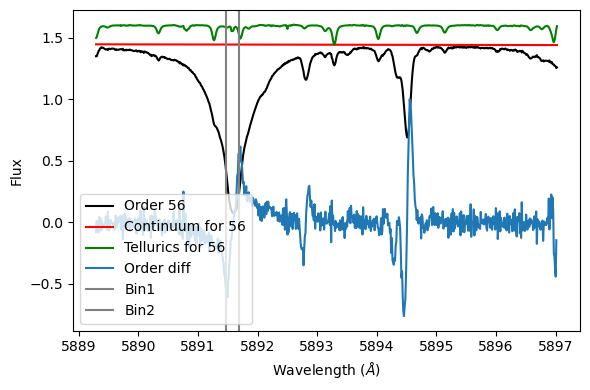

In [114]:
plt.figure(dpi=100)
order = 56
nstart = 3700
nfinish = -3500
bin1 = 3900
bin2 = 3920
plt.plot(w[order, nstart:nfinish], s[order, nstart:nfinish], c='k', label=f'Order {order}')
plt.plot(w[order, nstart:nfinish], c[order, nstart:nfinish], c='r', label=f'Continuum for {order}')
plt.plot(w[order, nstart:nfinish], t[order, nstart:nfinish] * 1.6, c='g', label=f'Tellurics for {order}')
diff = np.diff(s[order, nstart:nfinish] / t[order, nstart:nfinish])
diff /= np.max(diff)
plt.plot(w[order, nstart:nfinish-1], diff, label='Order diff')
plt.axvline(w[order, bin1], c='grey', label='Bin1')
plt.axvline(w[order, bin2], c='grey', label='Bin2')
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("Flux")
plt.legend(loc='lower left')
plt.tight_layout();

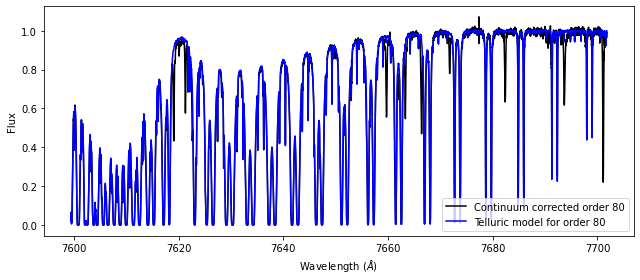

In [92]:
plt.figure(figsize=(9,4))
order = 80
plt.plot(w[order, :], s[order, :] / c[order, :], c='k', label=f'Continuum corrected order {order}')
plt.plot(w[order, :], t[order, :], c='blue', label=f'Telluric model for order {order}')
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("Flux")
plt.legend(loc='lower right')
plt.tight_layout();

Hopeully that's enough to get going!

Which order has what wavelength? 

In [10]:
for jj in range(nord):
    print(f"Order {jj:d}: {hdu[1].data['wavelength'][jj, :].min():.2f} - {hdu[1].data['wavelength'][jj, :].max():.2f} AA")

Order 0: 3796.64 - 3853.91 AA
Order 1: 3820.57 - 3878.17 AA
Order 2: 3844.81 - 3902.73 AA
Order 3: 3869.35 - 3927.61 AA
Order 4: 3894.21 - 3952.80 AA
Order 5: 3919.39 - 3978.32 AA
Order 6: 3944.89 - 4004.17 AA
Order 7: 3970.73 - 4030.35 AA
Order 8: 3996.90 - 4056.89 AA
Order 9: 4023.42 - 4083.77 AA
Order 10: 4050.30 - 4111.01 AA
Order 11: 4077.53 - 4138.62 AA
Order 12: 4105.13 - 4166.60 AA
Order 13: 4133.10 - 4194.96 AA
Order 14: 4161.46 - 4223.70 AA
Order 15: 4190.21 - 4252.85 AA
Order 16: 4219.36 - 4282.40 AA
Order 17: 4248.91 - 4312.36 AA
Order 18: 4278.88 - 4342.74 AA
Order 19: 4309.27 - 4373.56 AA
Order 20: 4340.10 - 4404.81 AA
Order 21: 4371.36 - 4436.52 AA
Order 22: 4403.09 - 4468.68 AA
Order 23: 4435.27 - 4501.32 AA
Order 24: 4467.93 - 4534.43 AA
Order 25: 4501.07 - 4568.03 AA
Order 26: 4534.70 - 4602.14 AA
Order 27: 4568.84 - 4636.75 AA
Order 28: 4603.49 - 4671.89 AA
Order 29: 4638.68 - 4707.57 AA
Order 30: 4674.40 - 4743.80 AA
Order 31: 4710.68 - 4780.59 AA
Order 32: 4747.52 